In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import

import joblib
import warnings 
warnings.filterwarnings('ignore')

In [78]:
hr = pd.read_csv(r'C:\Users\hites\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [79]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Exploratory data analysis (EDA)

In [81]:
hr.shape

(1470, 35)

In [82]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [83]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [84]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The described method it displays that there is no missing data as every column has the same count (1470) maybe columns like Monthlyincome, Totalworkingyears, YearsAtCompany, YearsinCurrentRole, YearSinceLastPromotion, YearWithCurrManager have huge differences in their 75 % and 100% so they must have some amount of outlier that is needed to be treated.

In [85]:
for column in hr.columns:
    print(f"Column: {column}")
    print(hr[column].value_counts())
    print(f"Total Unique Values in {column}: {hr[column].nunique()}")
    print("\n")

Column: Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
Total Unique Values in Age: 43


Column: Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
Total Unique Values in Attrition: 2


Column: BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Total Unique Values in BusinessTravel: 3


Column: DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
Total Unique Values in DailyRate: 886


Column: Department
Research & Development   

Dropping the unnecessary Columns because their no contribution in the dataset 

In [86]:
# Drop unnecessary columns
hr= hr.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [87]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Seperating Numerical and Categorial data

In [88]:
categorial_col = []
for i in hr.dtypes.index:
    if hr.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in hr.dtypes.index:
    if hr.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


Numerical Columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


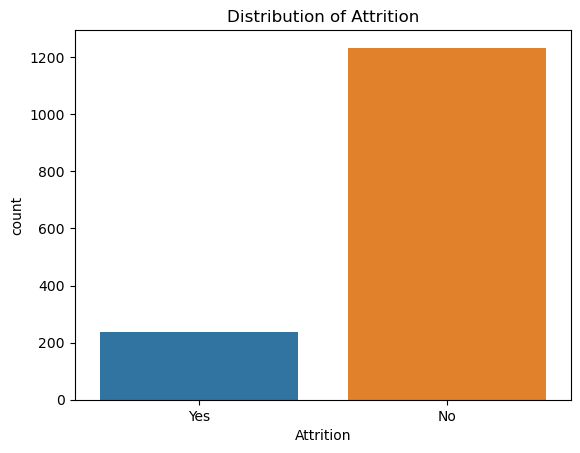

In [89]:
# Countplot of Attrition(Target value)
sns.countplot(x='Attrition', data=hr)
plt.title('Distribution of Attrition')
plt.show()

([<matplotlib.patches.Wedge at 0x200cff4e460>,
 [Text(-1.0930587195656423, 0.606401381579494, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6558352317393852, 0.3638408289476963, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

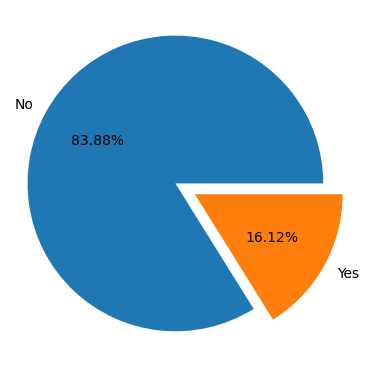

In [90]:
plt.pie(hr['Attrition'].value_counts().values,labels=hr['Attrition'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

As we can observe that 16.12% employees have left the job

Visualising the relationship in numerical data

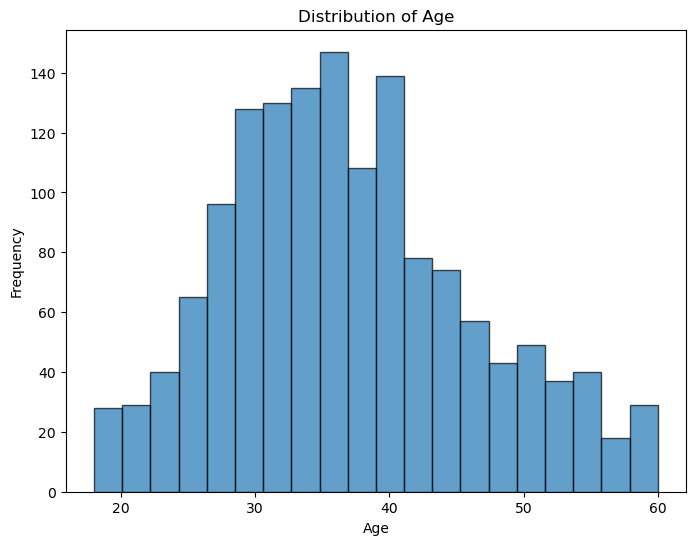

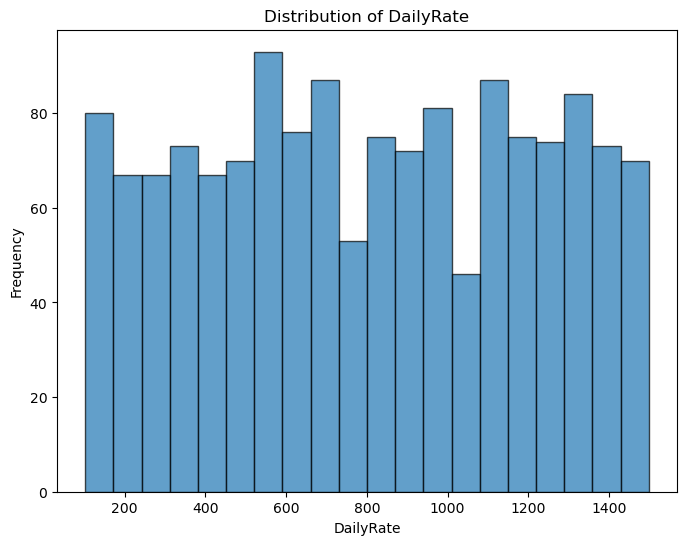

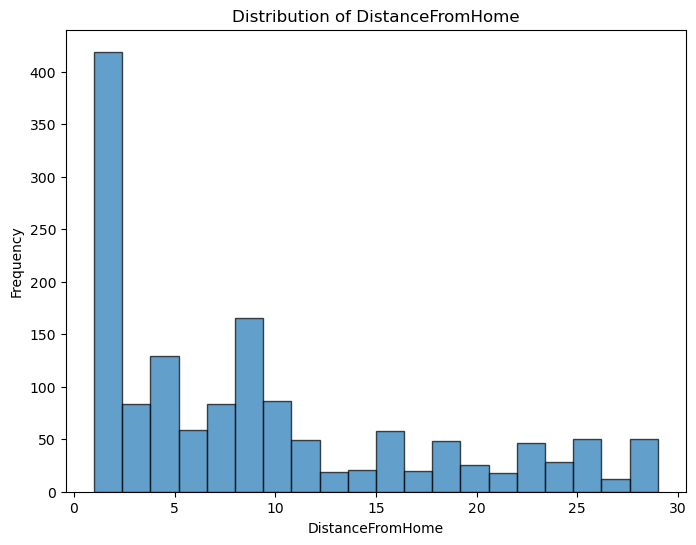

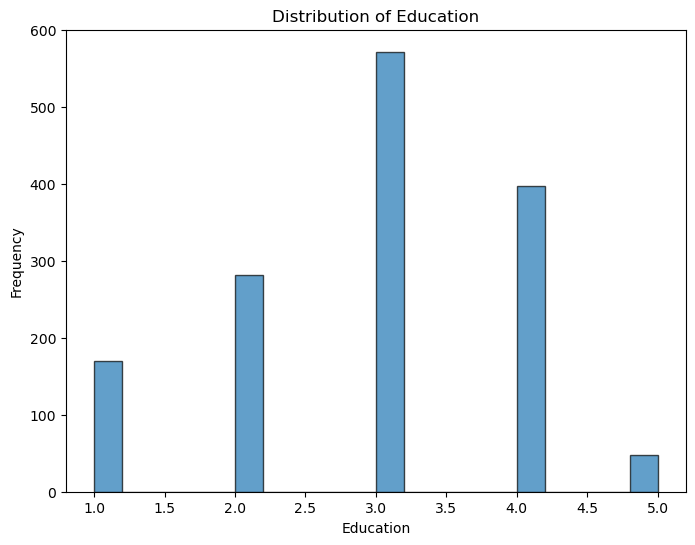

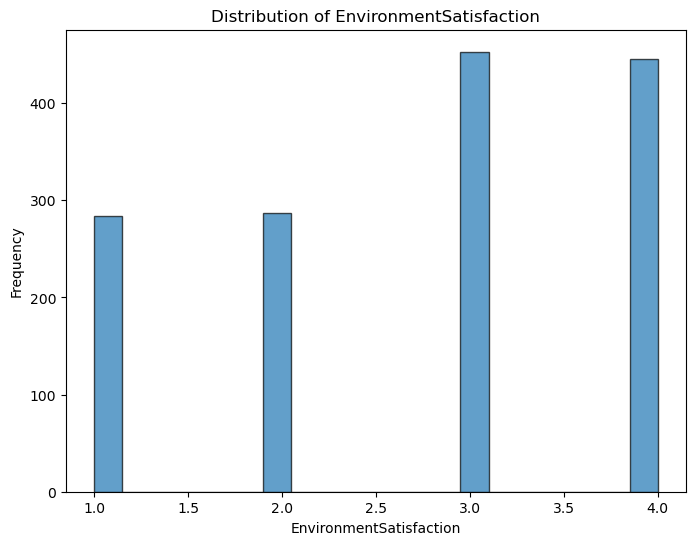

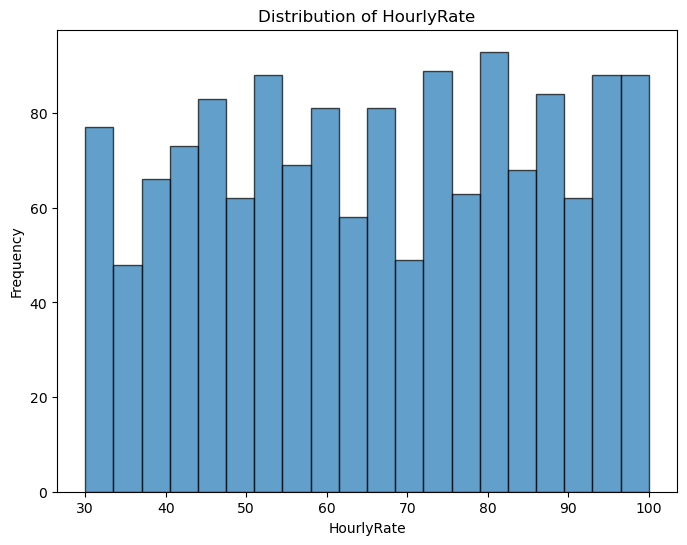

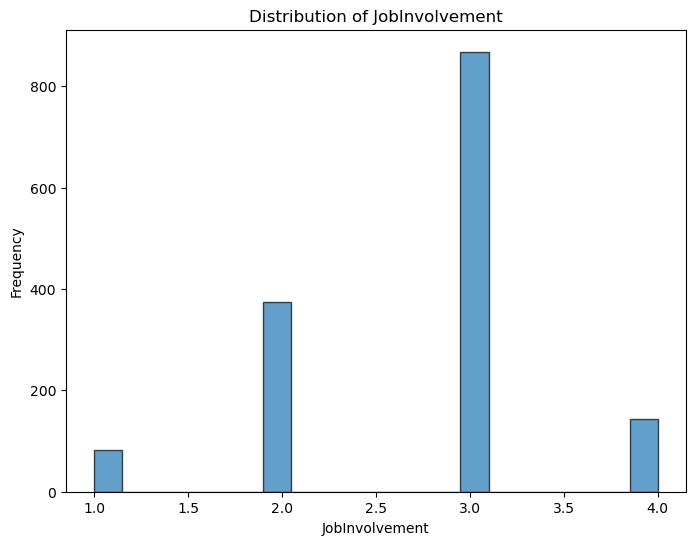

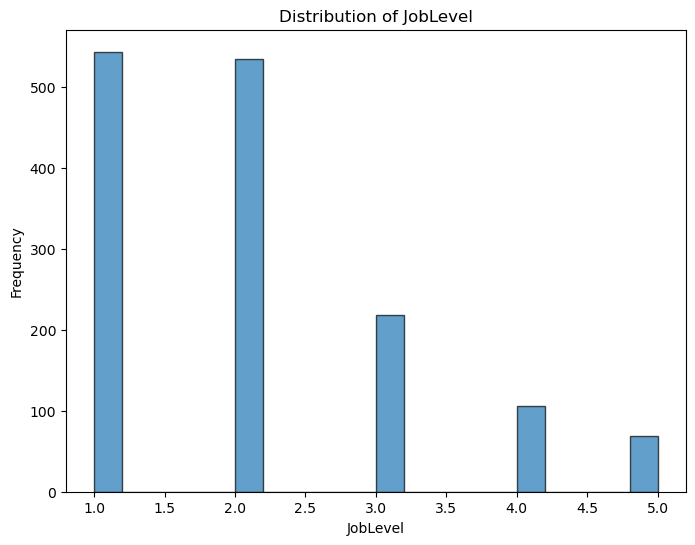

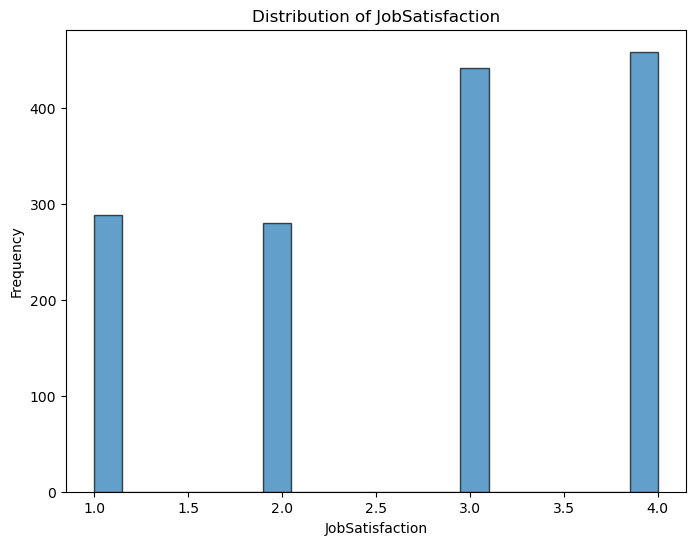

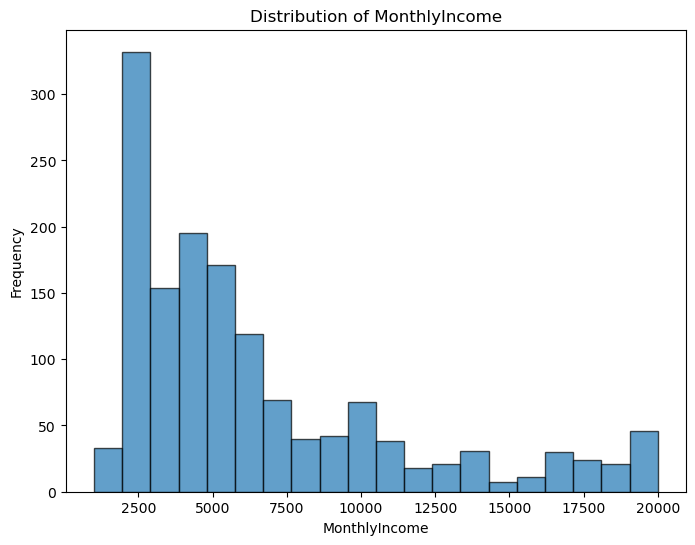

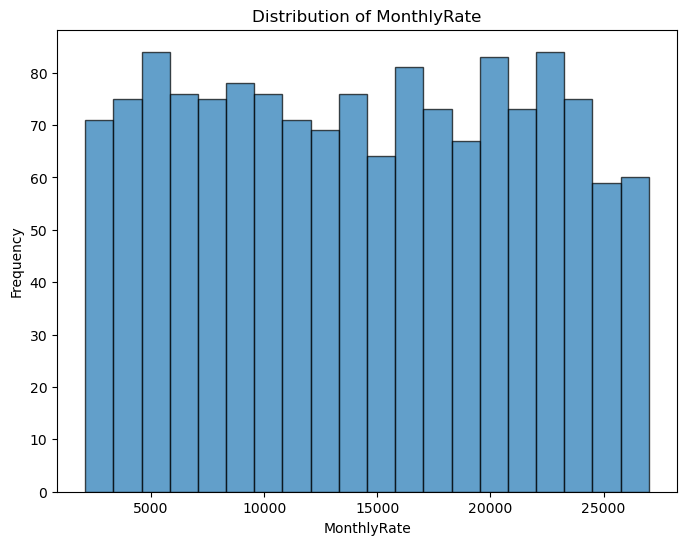

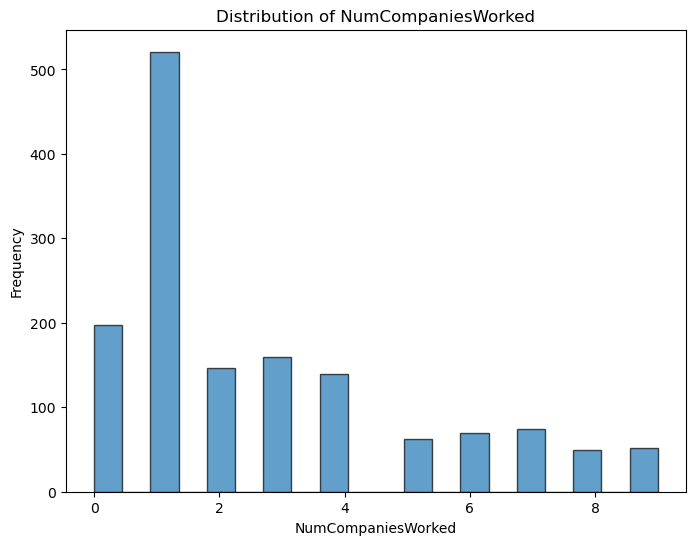

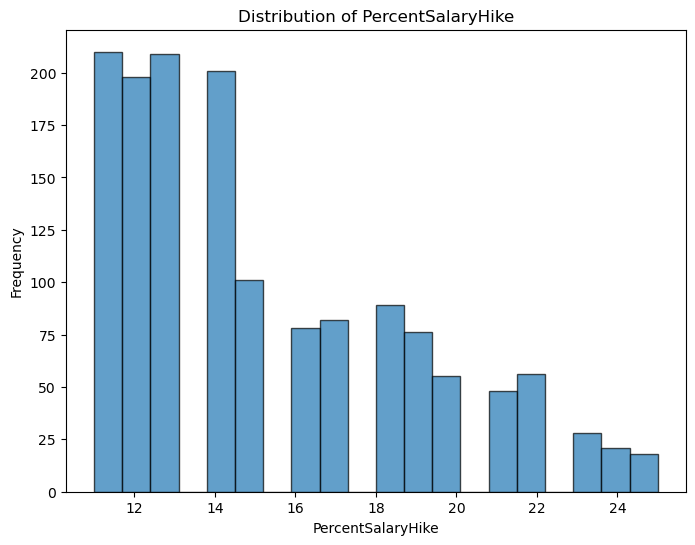

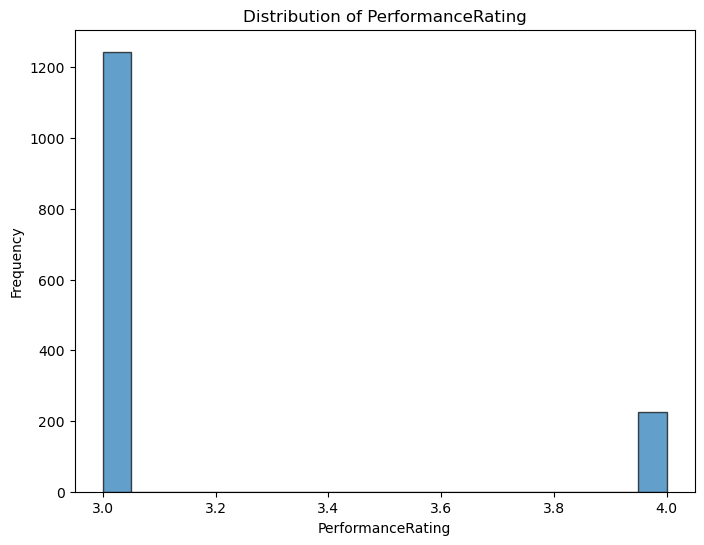

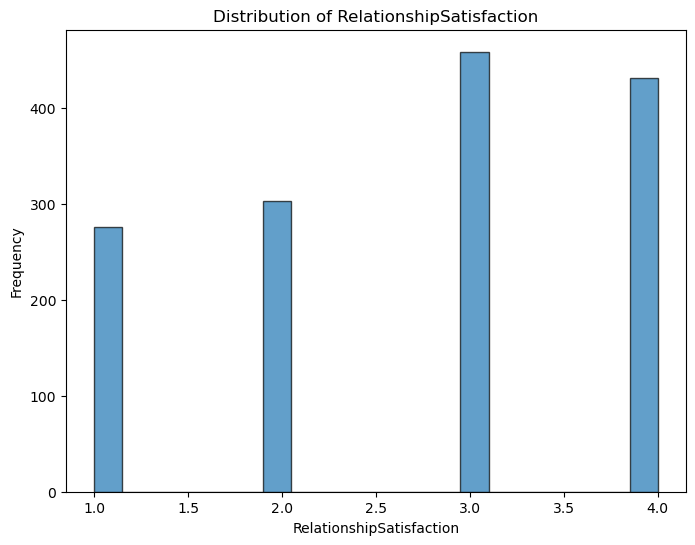

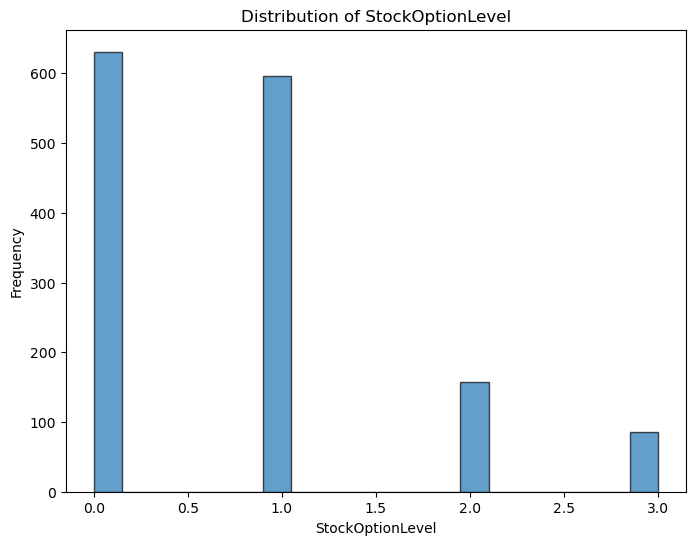

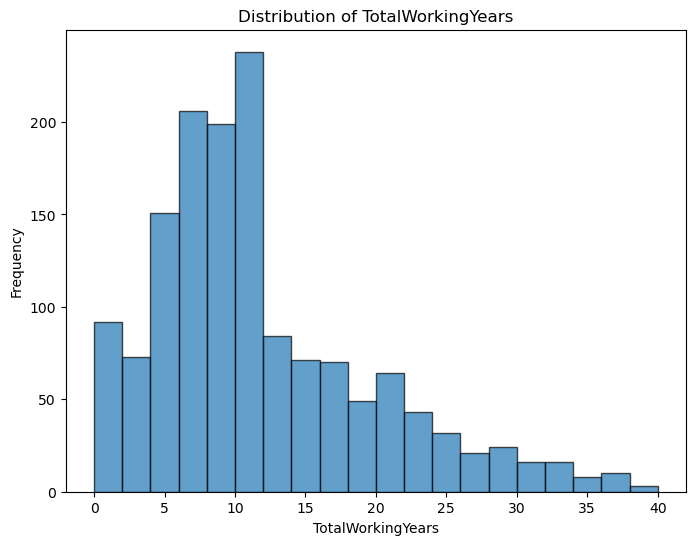

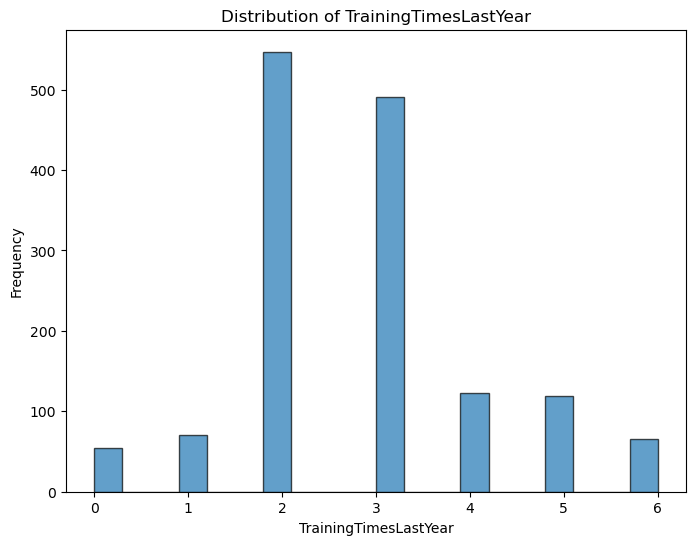

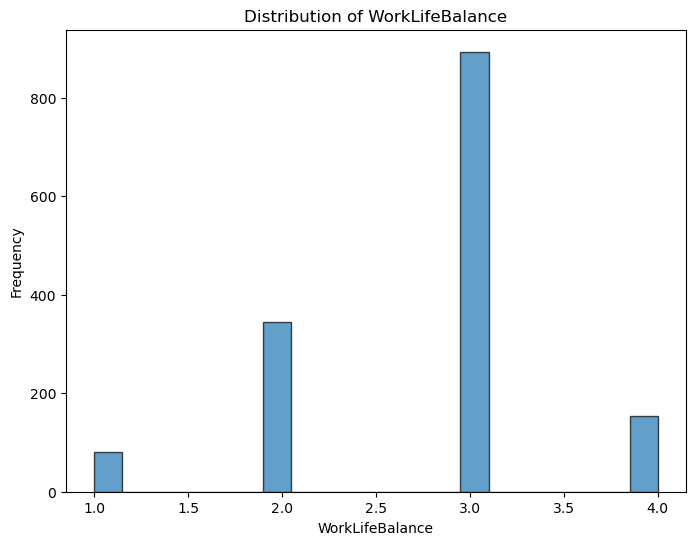

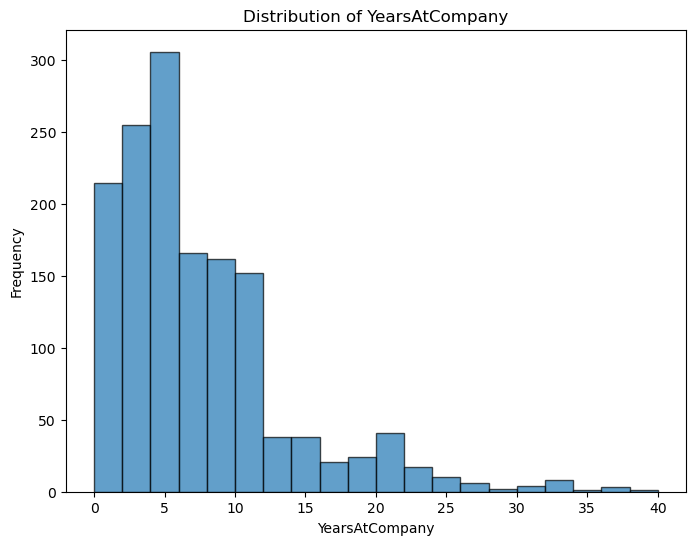

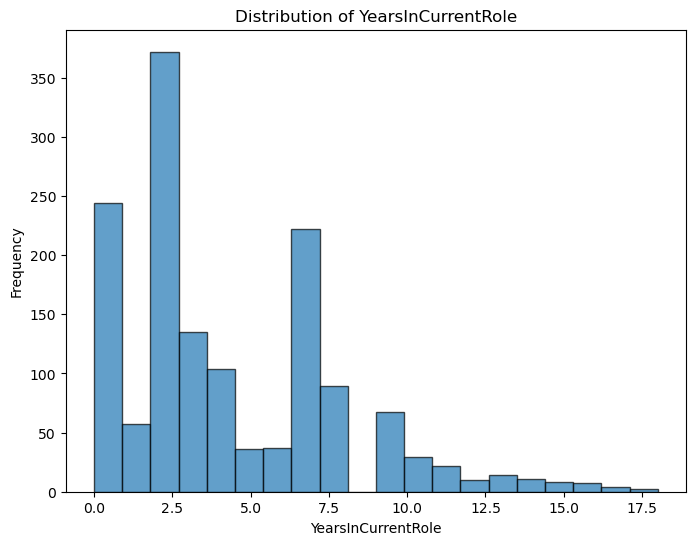

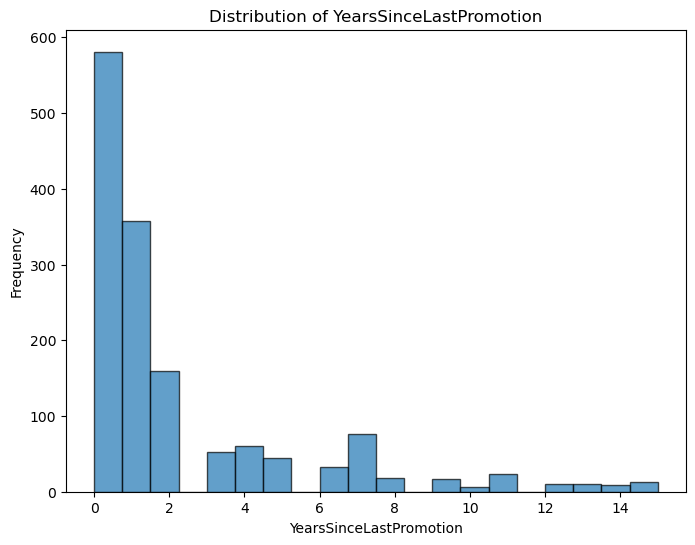

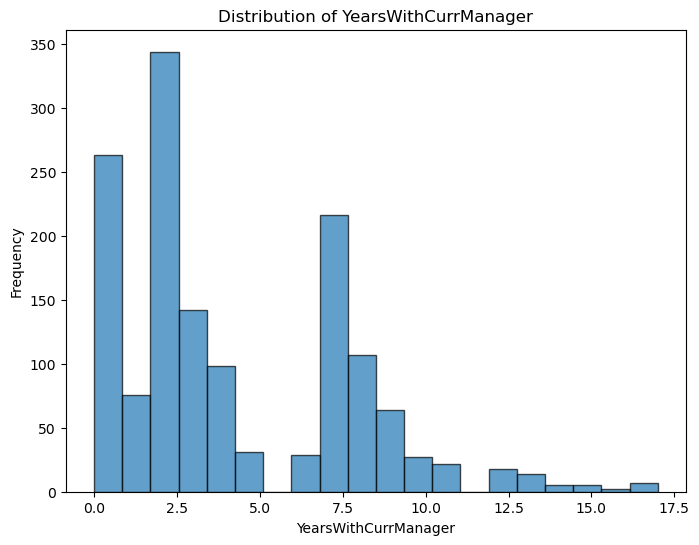

In [91]:
for feature in numerical_col:
    plt.figure(figsize=(8, 6))
    plt.hist(hr[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

 Visualization for categorial features.


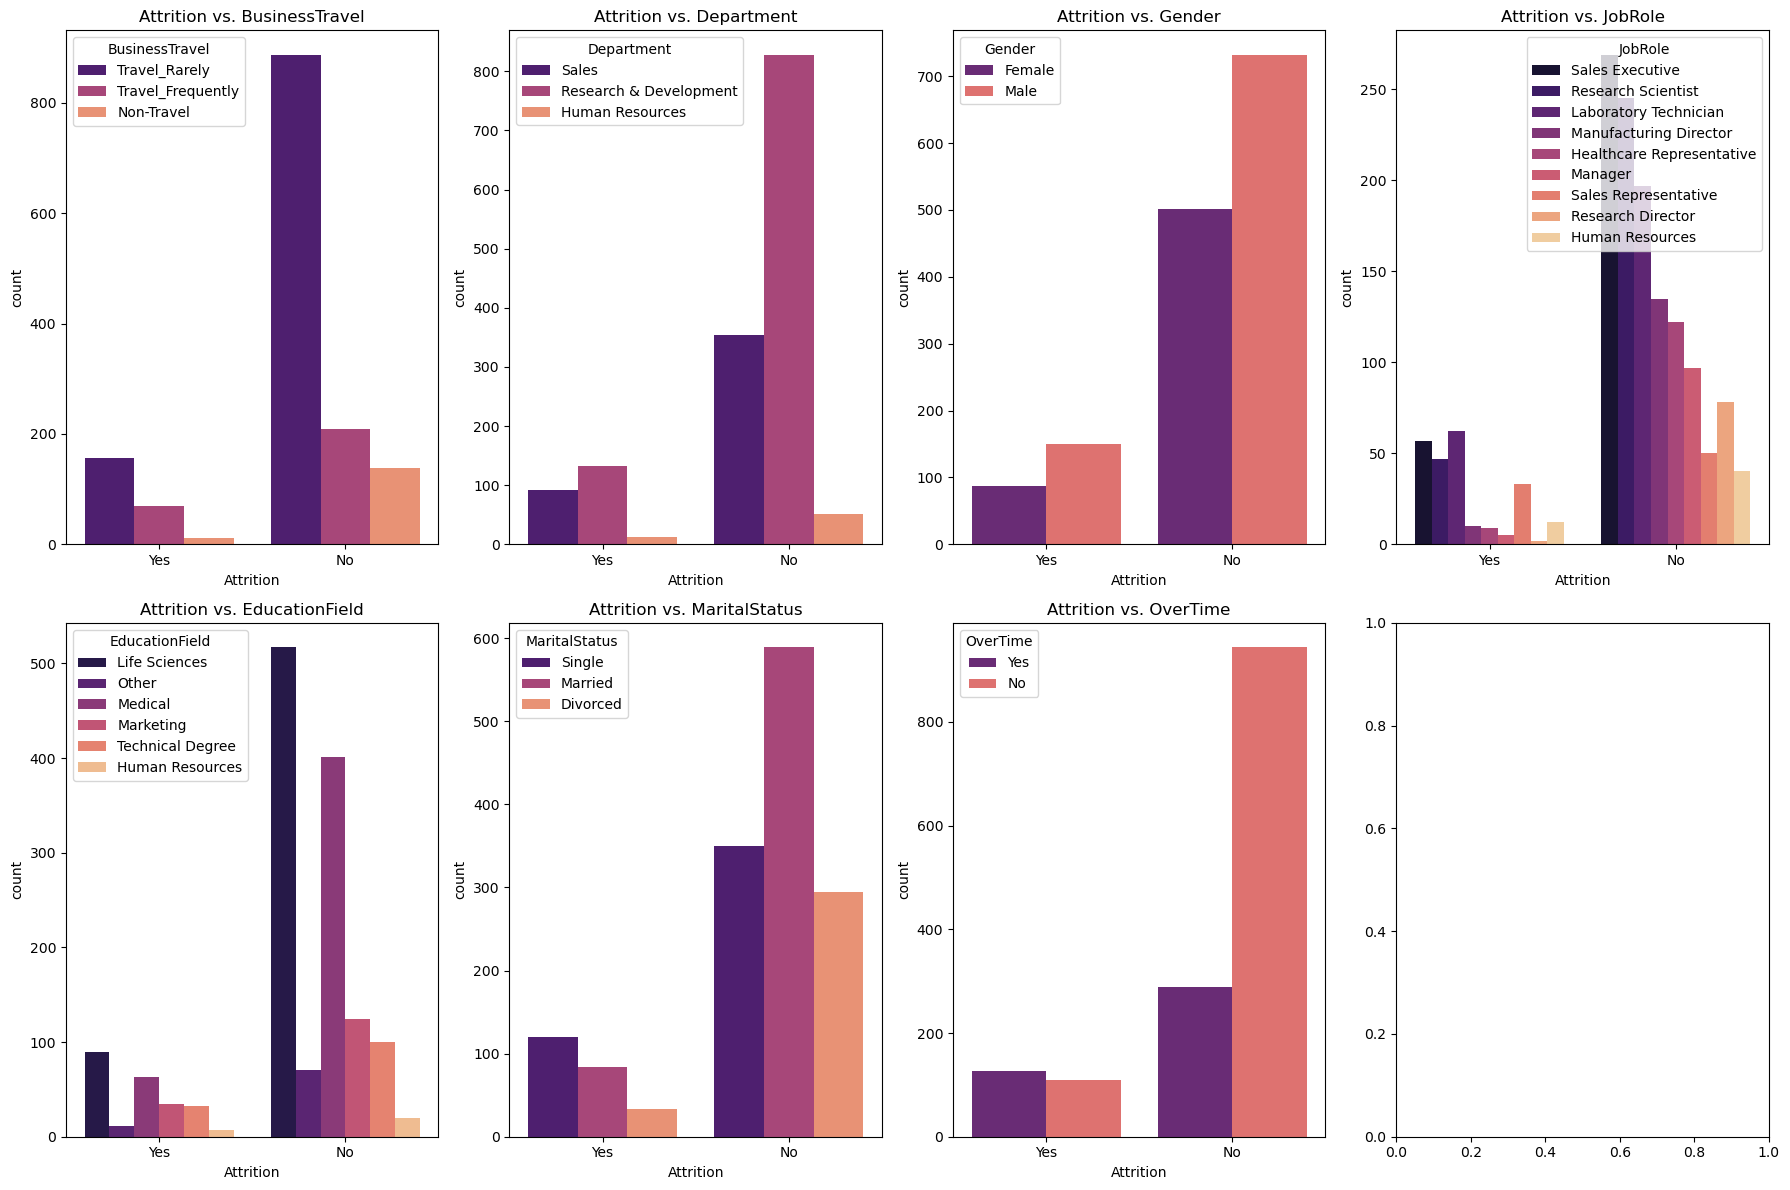

In [92]:
categorical_features = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'EducationField', 'MaritalStatus', 'OverTime']

fig, axss = plt.subplots(2, 4, figsize=[18, 12])

for ax, feature in zip(axss.flatten(), categorical_features):
    sns.countplot(x='Attrition', hue=feature, data=hr, ax=ax, palette='magma')
    ax.set_title(f'Attrition vs. {feature}')

plt.tight_layout()
plt.show()

from the above graph we can observe that attrition are more who Travel Rarely than others.

Attrition are more in Research & Development than other department.

Sale Representative has the highest proportion of leavers, followed by Laboratory Technician and Human Resources.

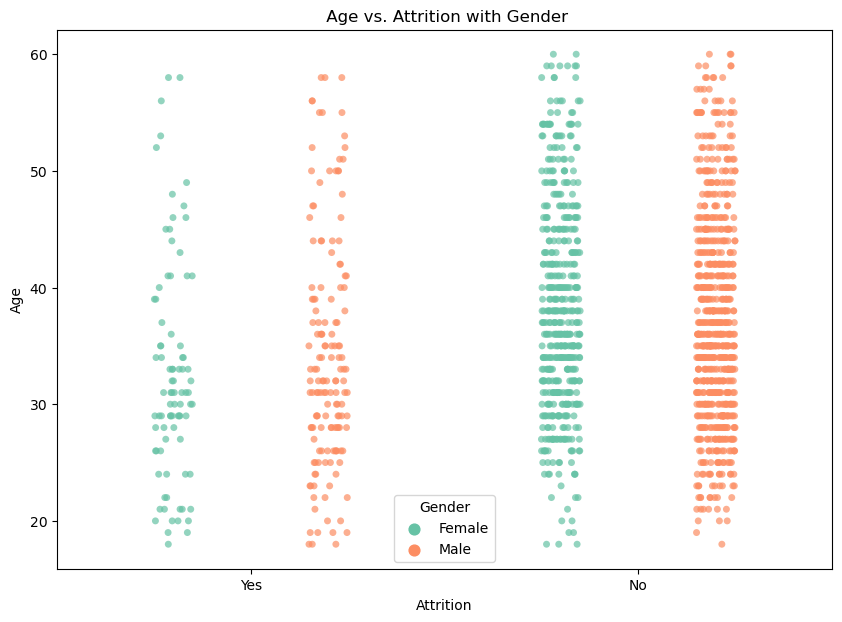

In [93]:
plt.figure(figsize=(10, 7))
sns.stripplot(x="Attrition", y="Age", hue="Gender", data=hr,
              palette="Set2", dodge=True, alpha=0.7, jitter=True)
plt.title(' Age vs. Attrition with Gender')
plt.show()


from above we can say that both male and female has wide range in age between 18 and 30. 

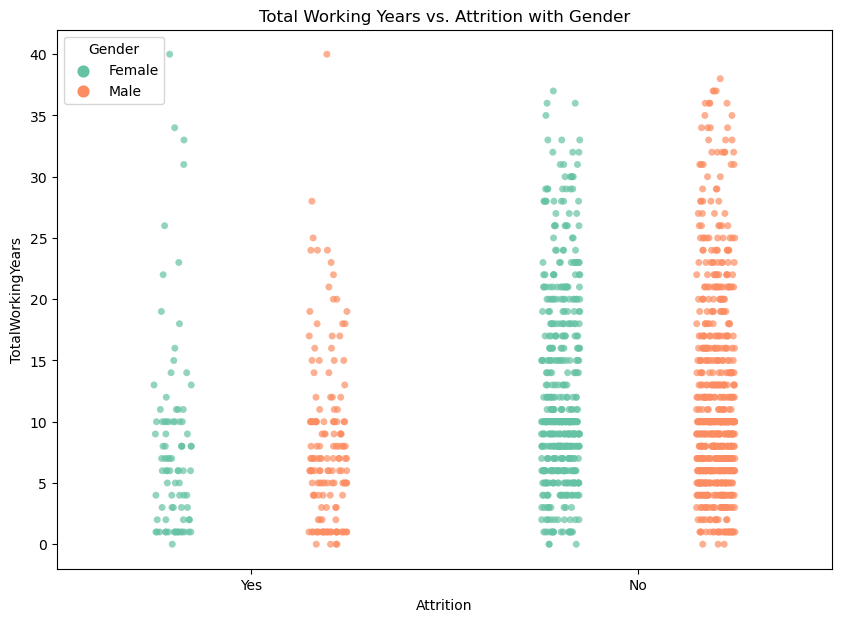

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.stripplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=hr,
              palette="Set2", dodge=True, alpha=0.7, jitter=True)
plt.title('Total Working Years vs. Attrition with Gender')
plt.show()


from the above observation male and female mostly have Totlaworkexperienve in between range 0 to 10 years.

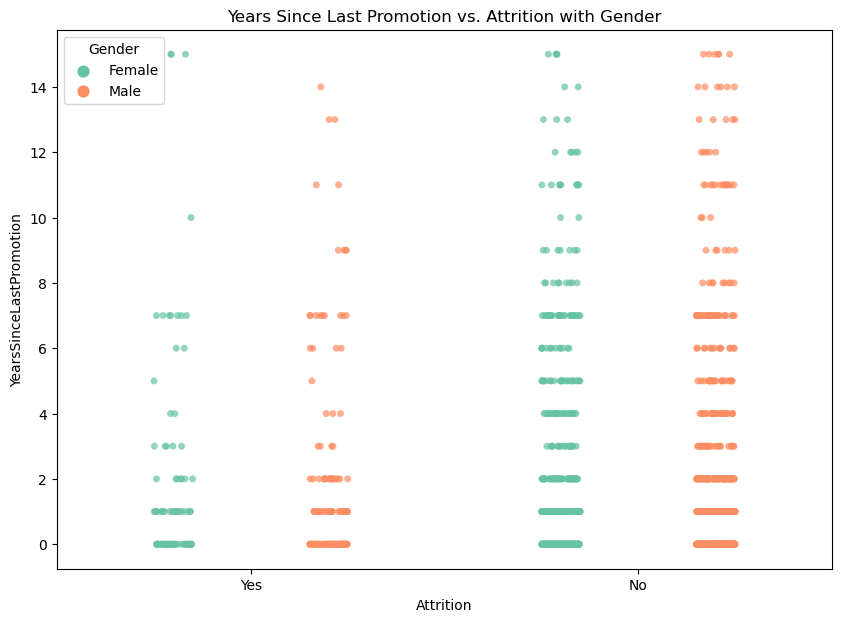

In [95]:
plt.figure(figsize=(10, 7))
sns.stripplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=hr,
              palette="Set2", dodge=True, alpha=0.7, jitter=True)
plt.title('Years Since Last Promotion vs. Attrition with Gender')
plt.show()

from above plot we have that for both male and female mostly are less than 5 years since they have got promoted

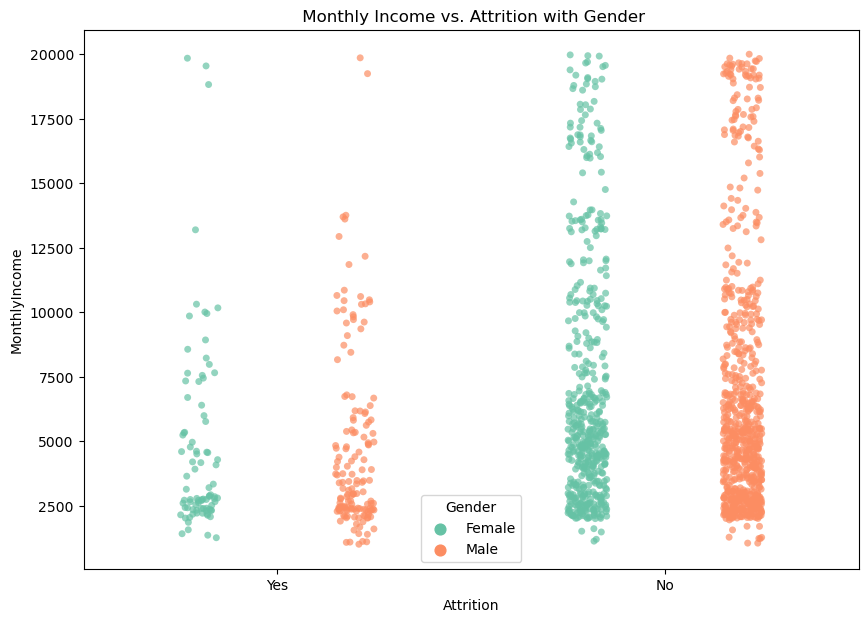

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.stripplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=hr,
              palette="Set2", dodge=True, alpha=0.7, jitter=True)
plt.title(' Monthly Income vs. Attrition with Gender')
plt.show()


from above we have observation that most of male and female are having Monthlyincome less than 5000 that have most attrition.

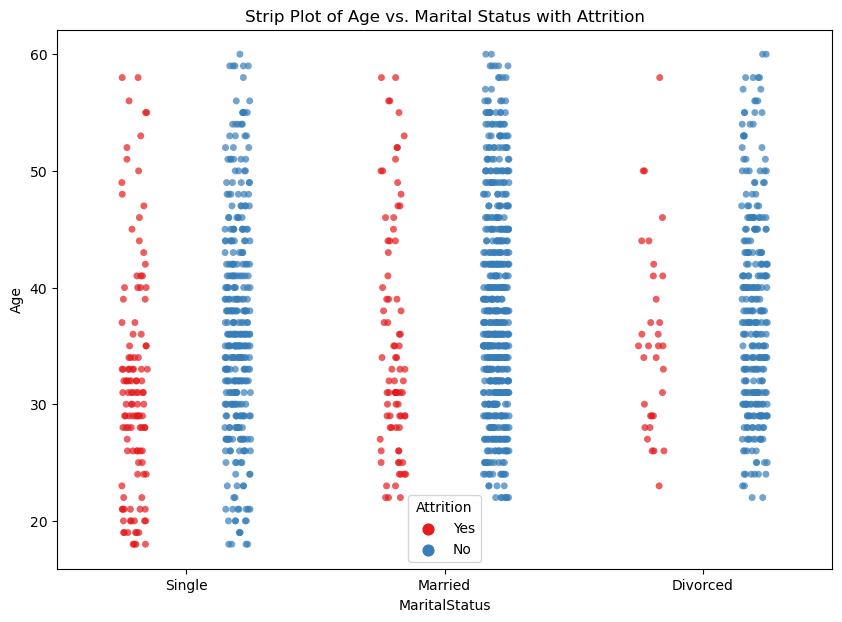

In [97]:
plt.figure(figsize=(10, 7))
sns.stripplot(x="MaritalStatus", y="Age", hue="Attrition", data=hr,
              palette="Set1", dodge=True, alpha=0.7, jitter=True)
plt.title('Strip Plot of Age vs. Marital Status with Attrition')
plt.show()

in this plot we can see that there is some Attrition when you are single and less when you are married but little when you are divorced.

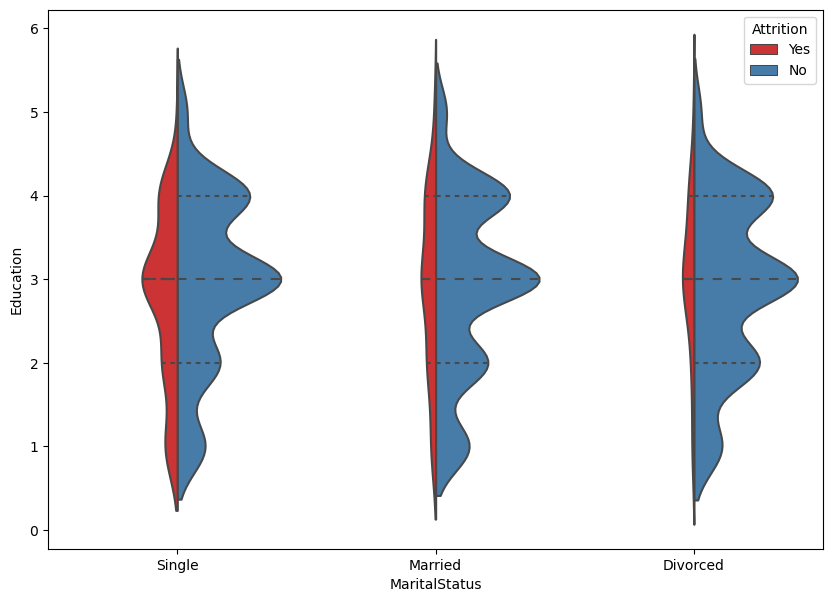

In [98]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=hr, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

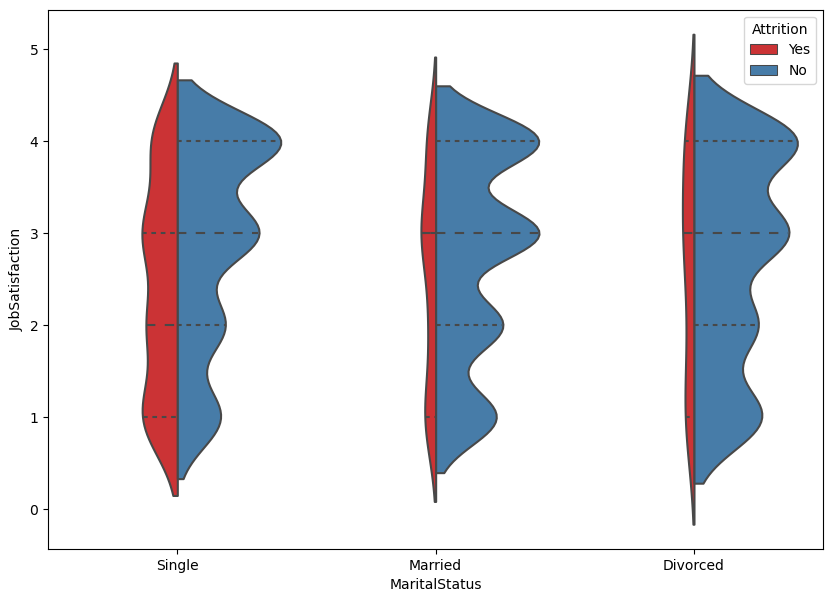

In [99]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=hr, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

above plot showing single are more satisfied with their job other than they are married or divorced.

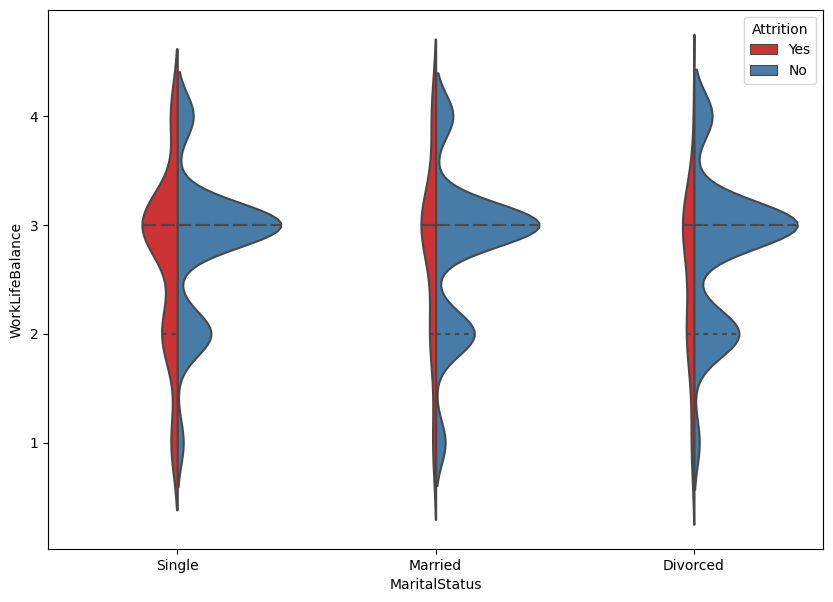

In [100]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=hr, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

from the above graph we can see that worklife of single is much balanced than married or divorced.

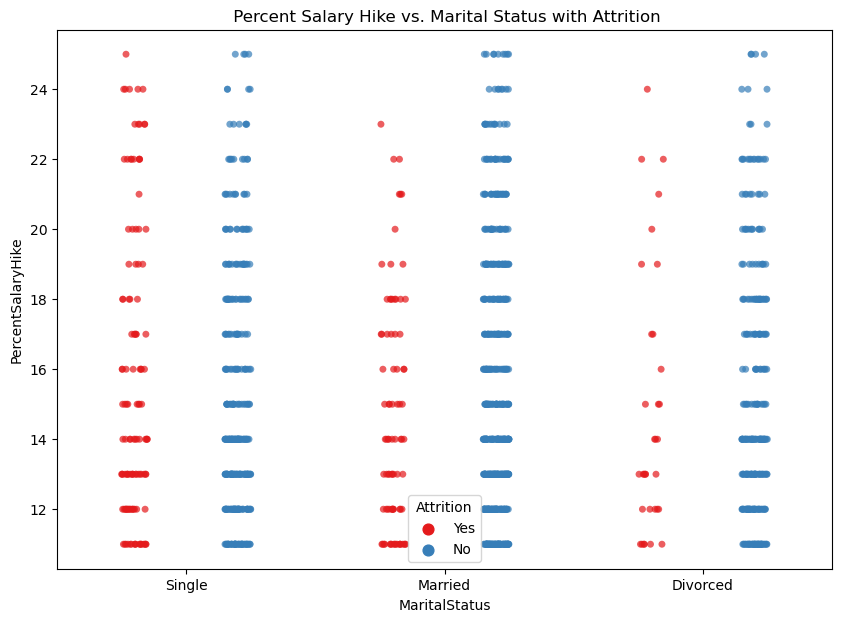

In [101]:
plt.figure(figsize=(10, 7))
sns.stripplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=hr,
              palette="Set1", dodge=True, alpha=0.7, jitter=True)
plt.title(' Percent Salary Hike vs. Marital Status with Attrition')
plt.show()


from the above figure we can say that hike in salary of single is higher than married or some one who got divorced. maybe,perhaps a single have less burden so there work is more effectiove so they get more hike in their salary.

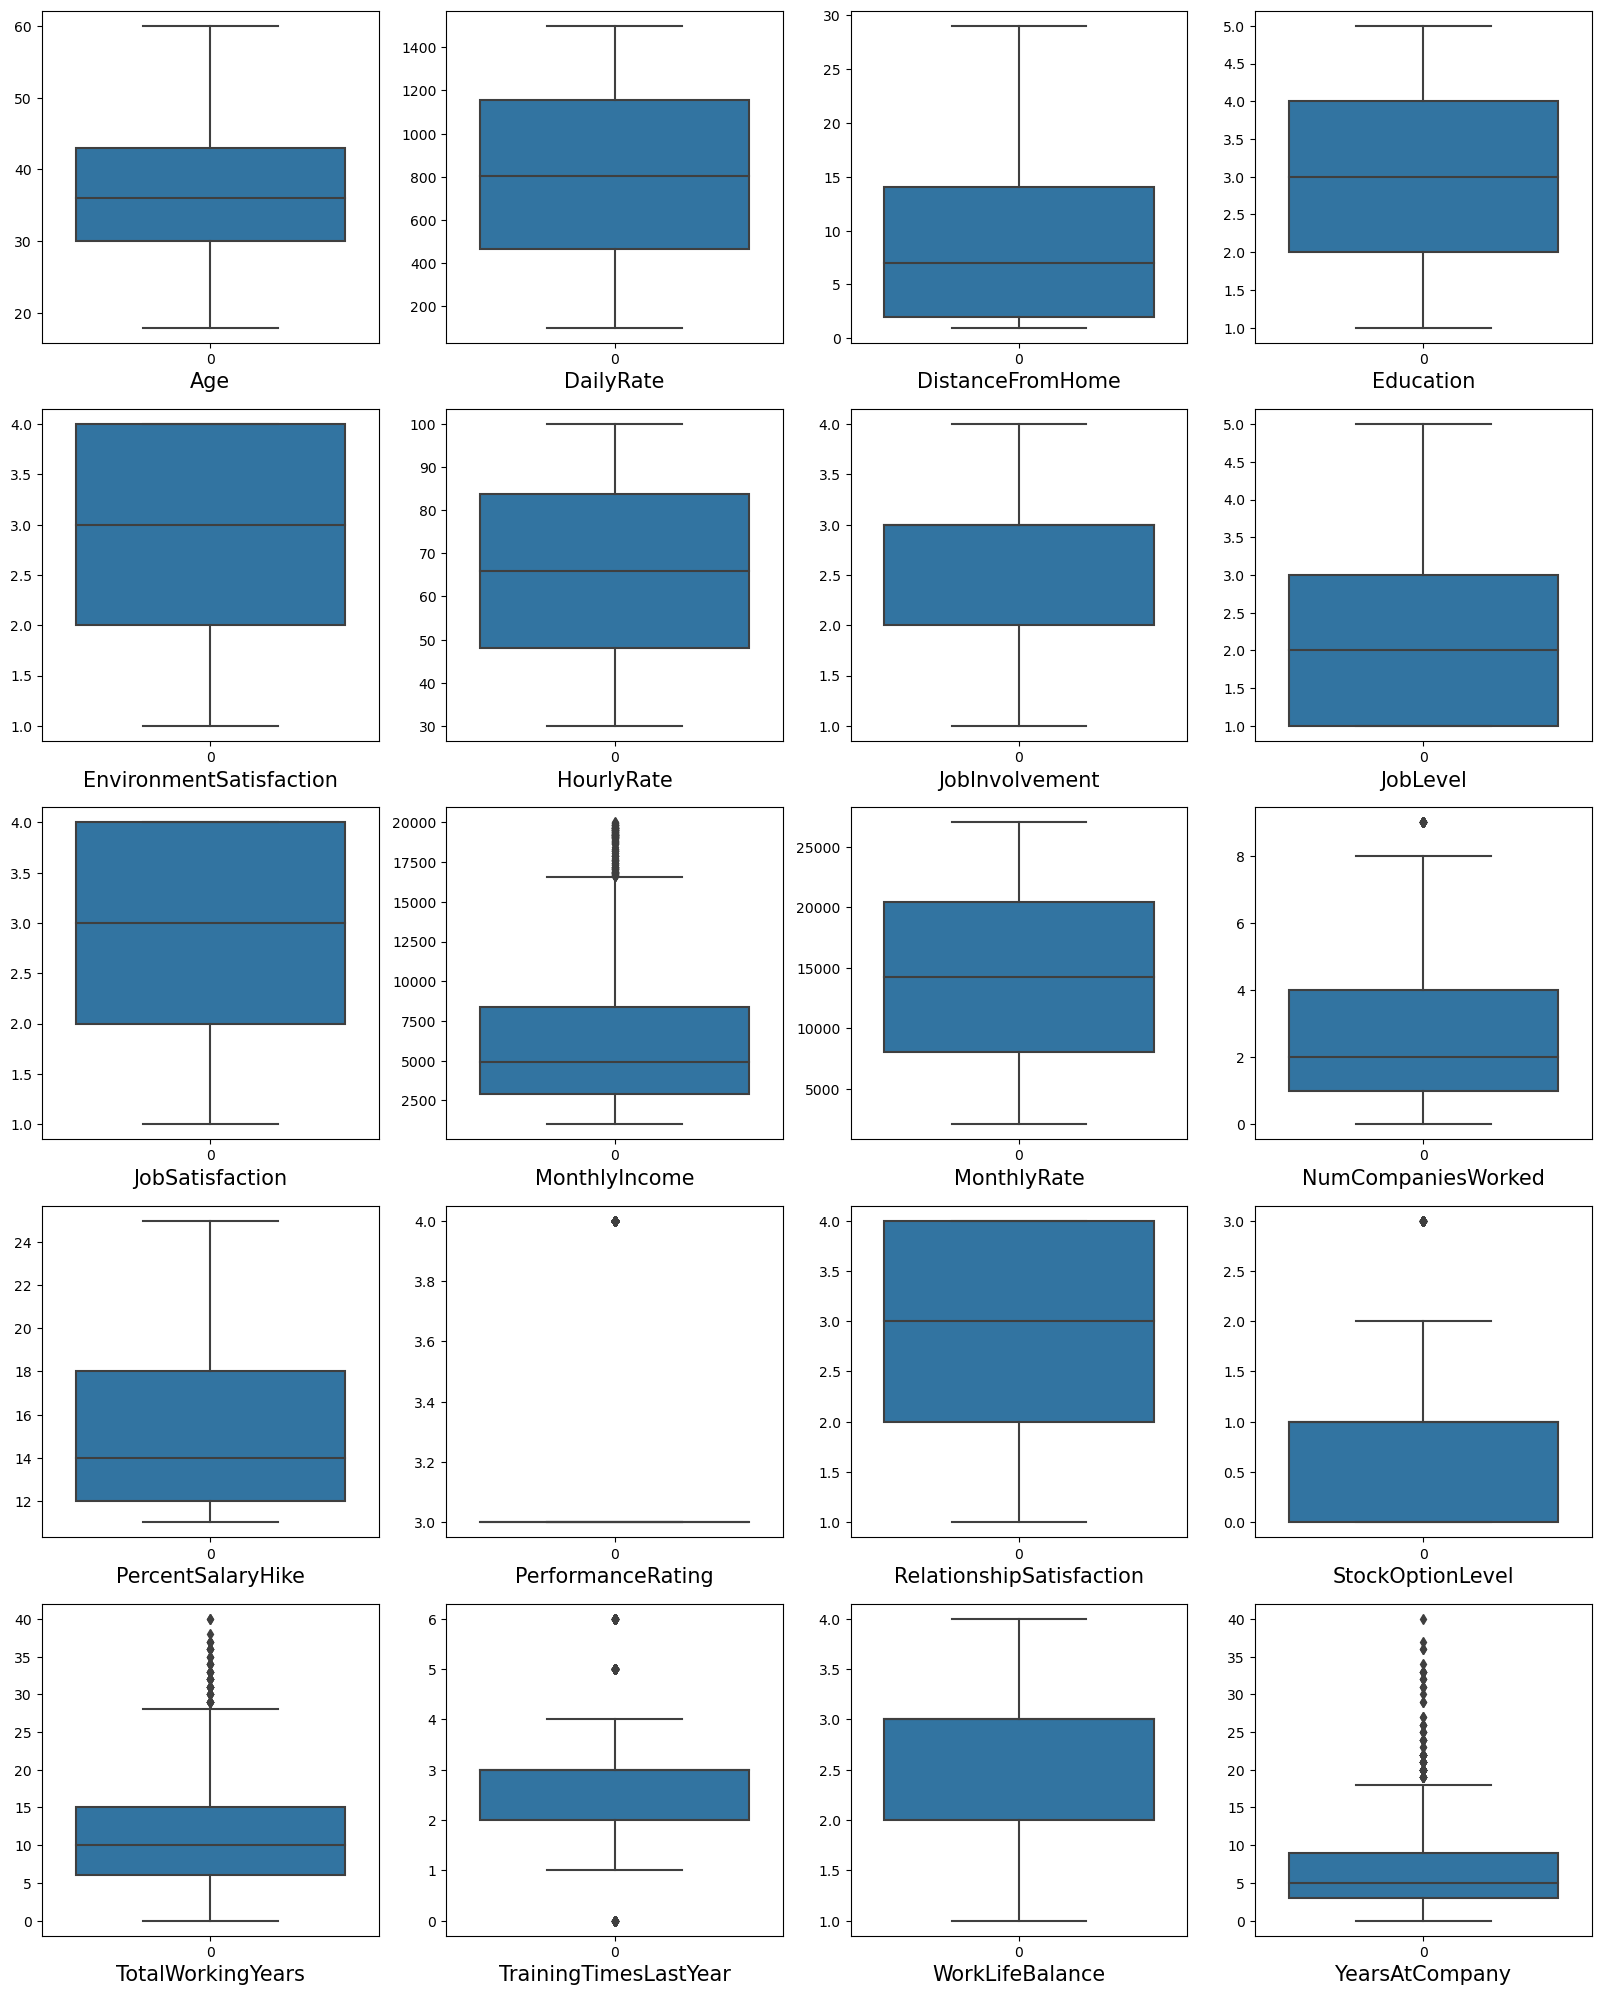

In [102]:
plt.figure(figsize=(20,25))
graph = 1

for column in numerical_col:
    if graph<=20 :
        plt.subplot(5,4,graph)
        sns.boxplot(data=hr[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()

# Encoding the categorical object datatype columns

In [103]:
le=LabelEncoder()
hr['Attrition']=le.fit_transform(hr['Attrition'])

In [28]:
hr['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

Here with the help of Label Encoder to Attrition that is our target column as it was object datatype we converted into integer64 type.

In [104]:
# Ordinal Encoder

oe = OrdinalEncoder()
hr['BusinessTravel'] = oe.fit_transform(hr['BusinessTravel'].values.reshape(-1,1))
hr['Department'] = oe.fit_transform(hr['Department'].values.reshape(-1,1))
hr['EducationField'] = oe.fit_transform(hr['EducationField'].values.reshape(-1,1))
hr['Gender'] = oe.fit_transform(hr['Gender'].values.reshape(-1,1))
hr['JobRole'] = oe.fit_transform(hr['JobRole'].values.reshape(-1,1))
hr['MaritalStatus'] = oe.fit_transform(hr['MaritalStatus'].values.reshape(-1,1))
hr['OverTime'] = oe.fit_transform(hr['OverTime'].values.reshape(-1,1))

Here we have used Ordinal Encoder in order to convert our some columns from object datatype to integer datatype.

In [105]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


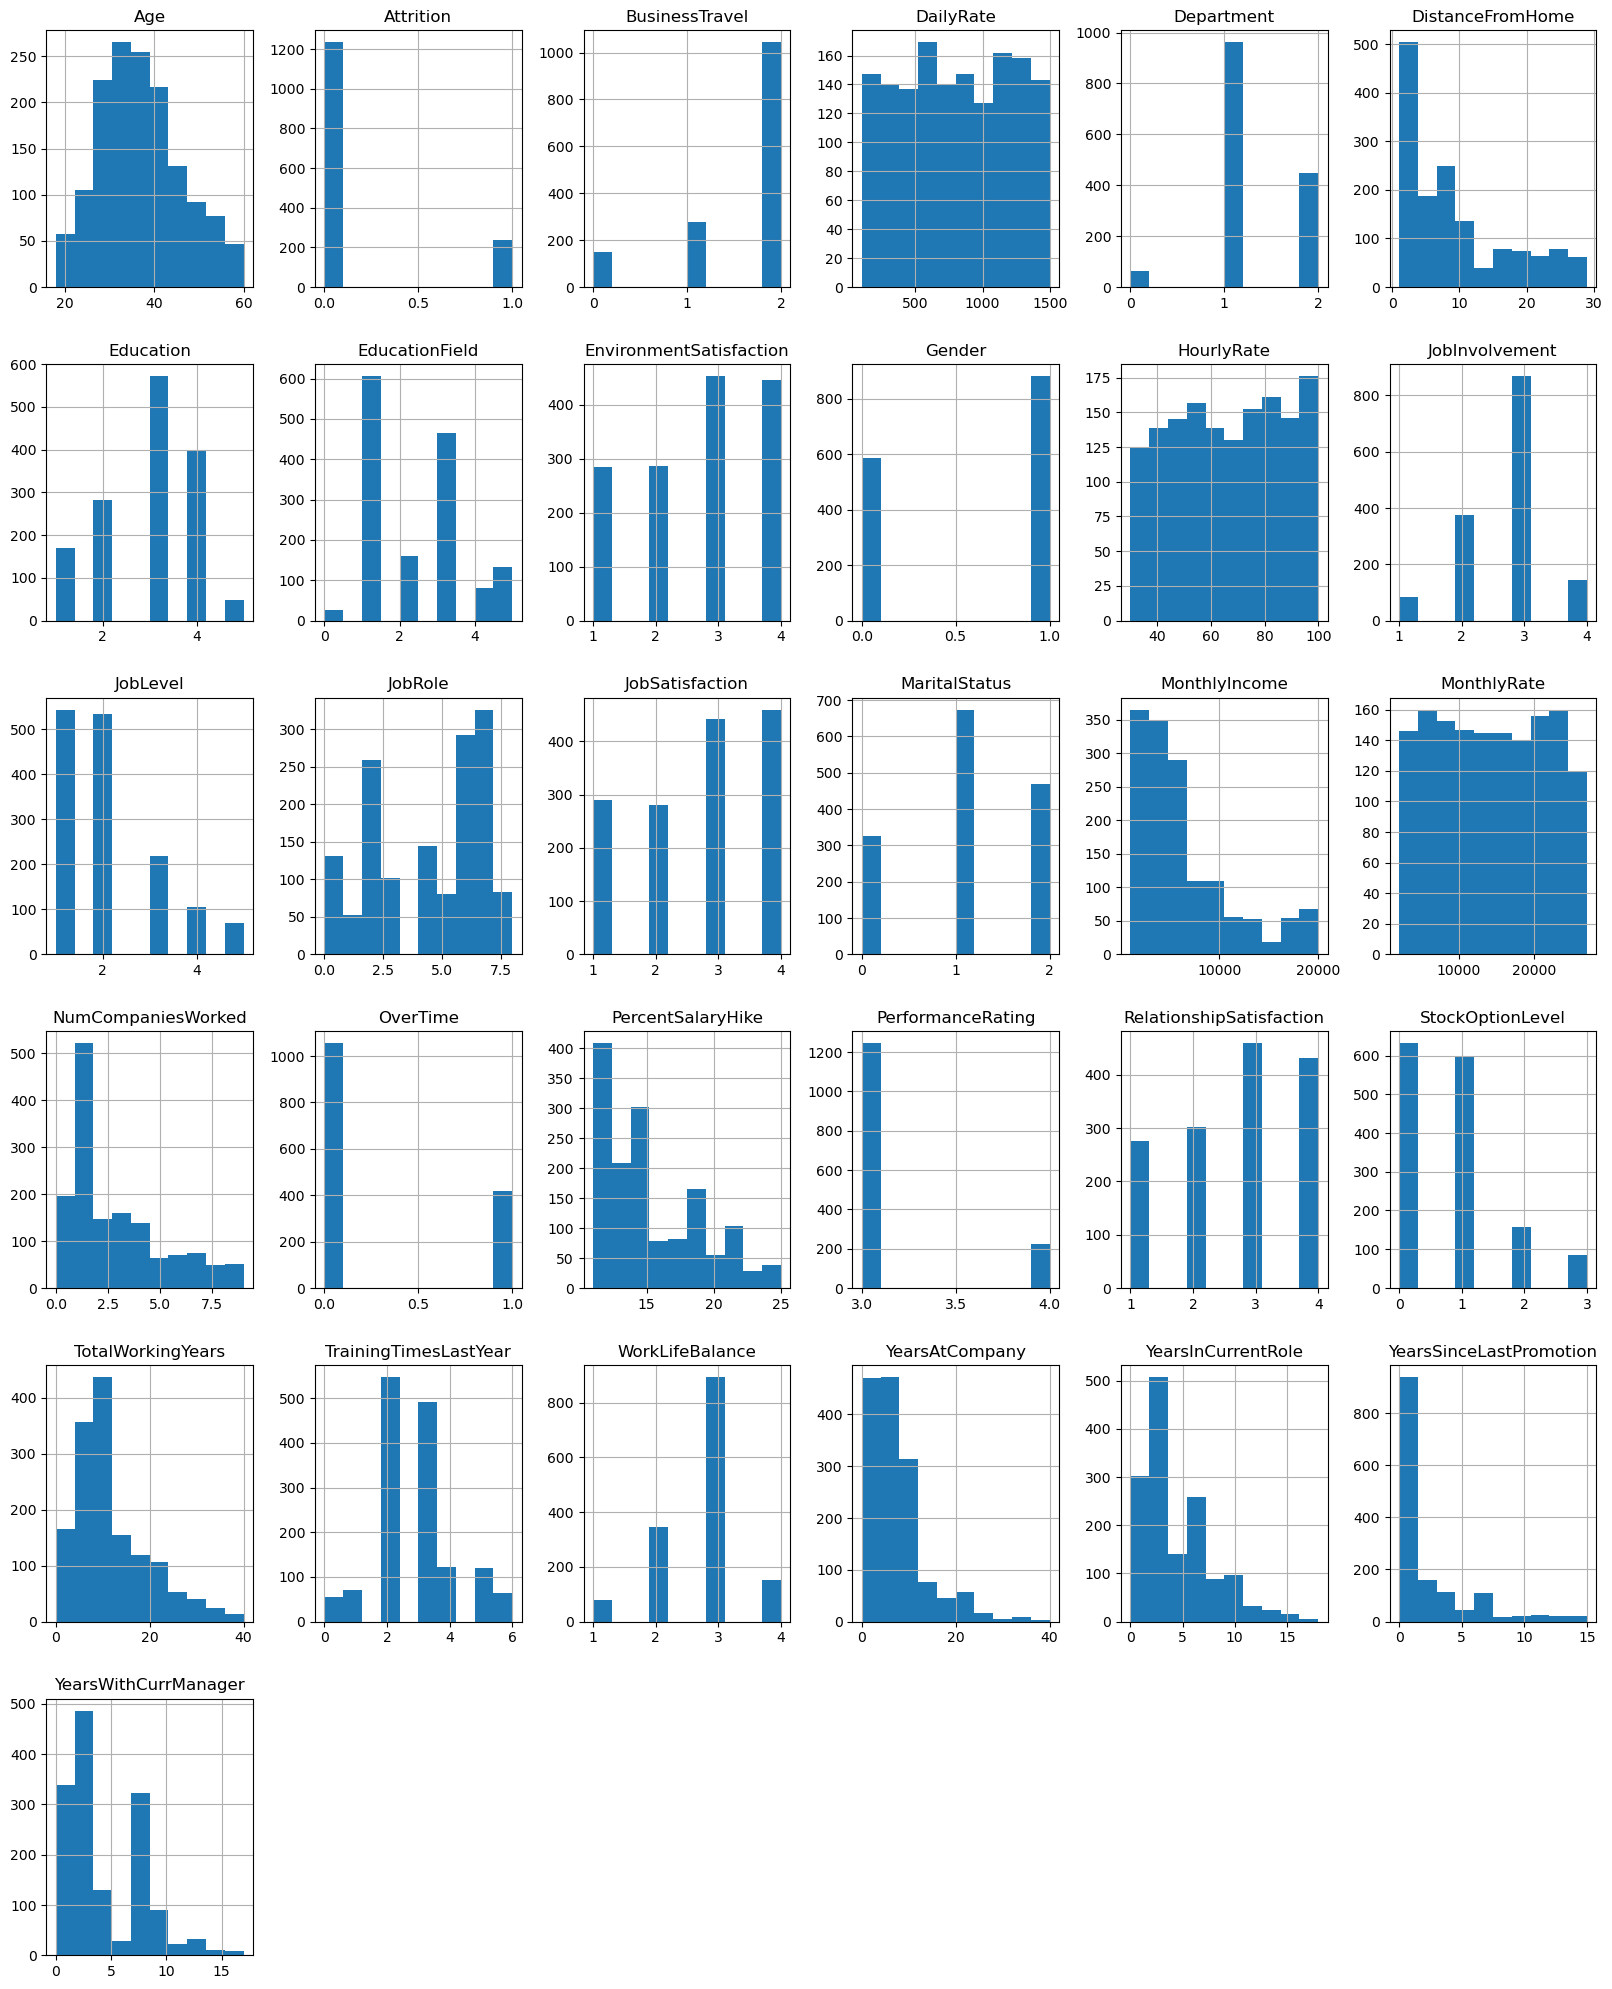

In [106]:
hr.hist(figsize=(20,25))
plt.show()

# Heatmap

In [107]:
hr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


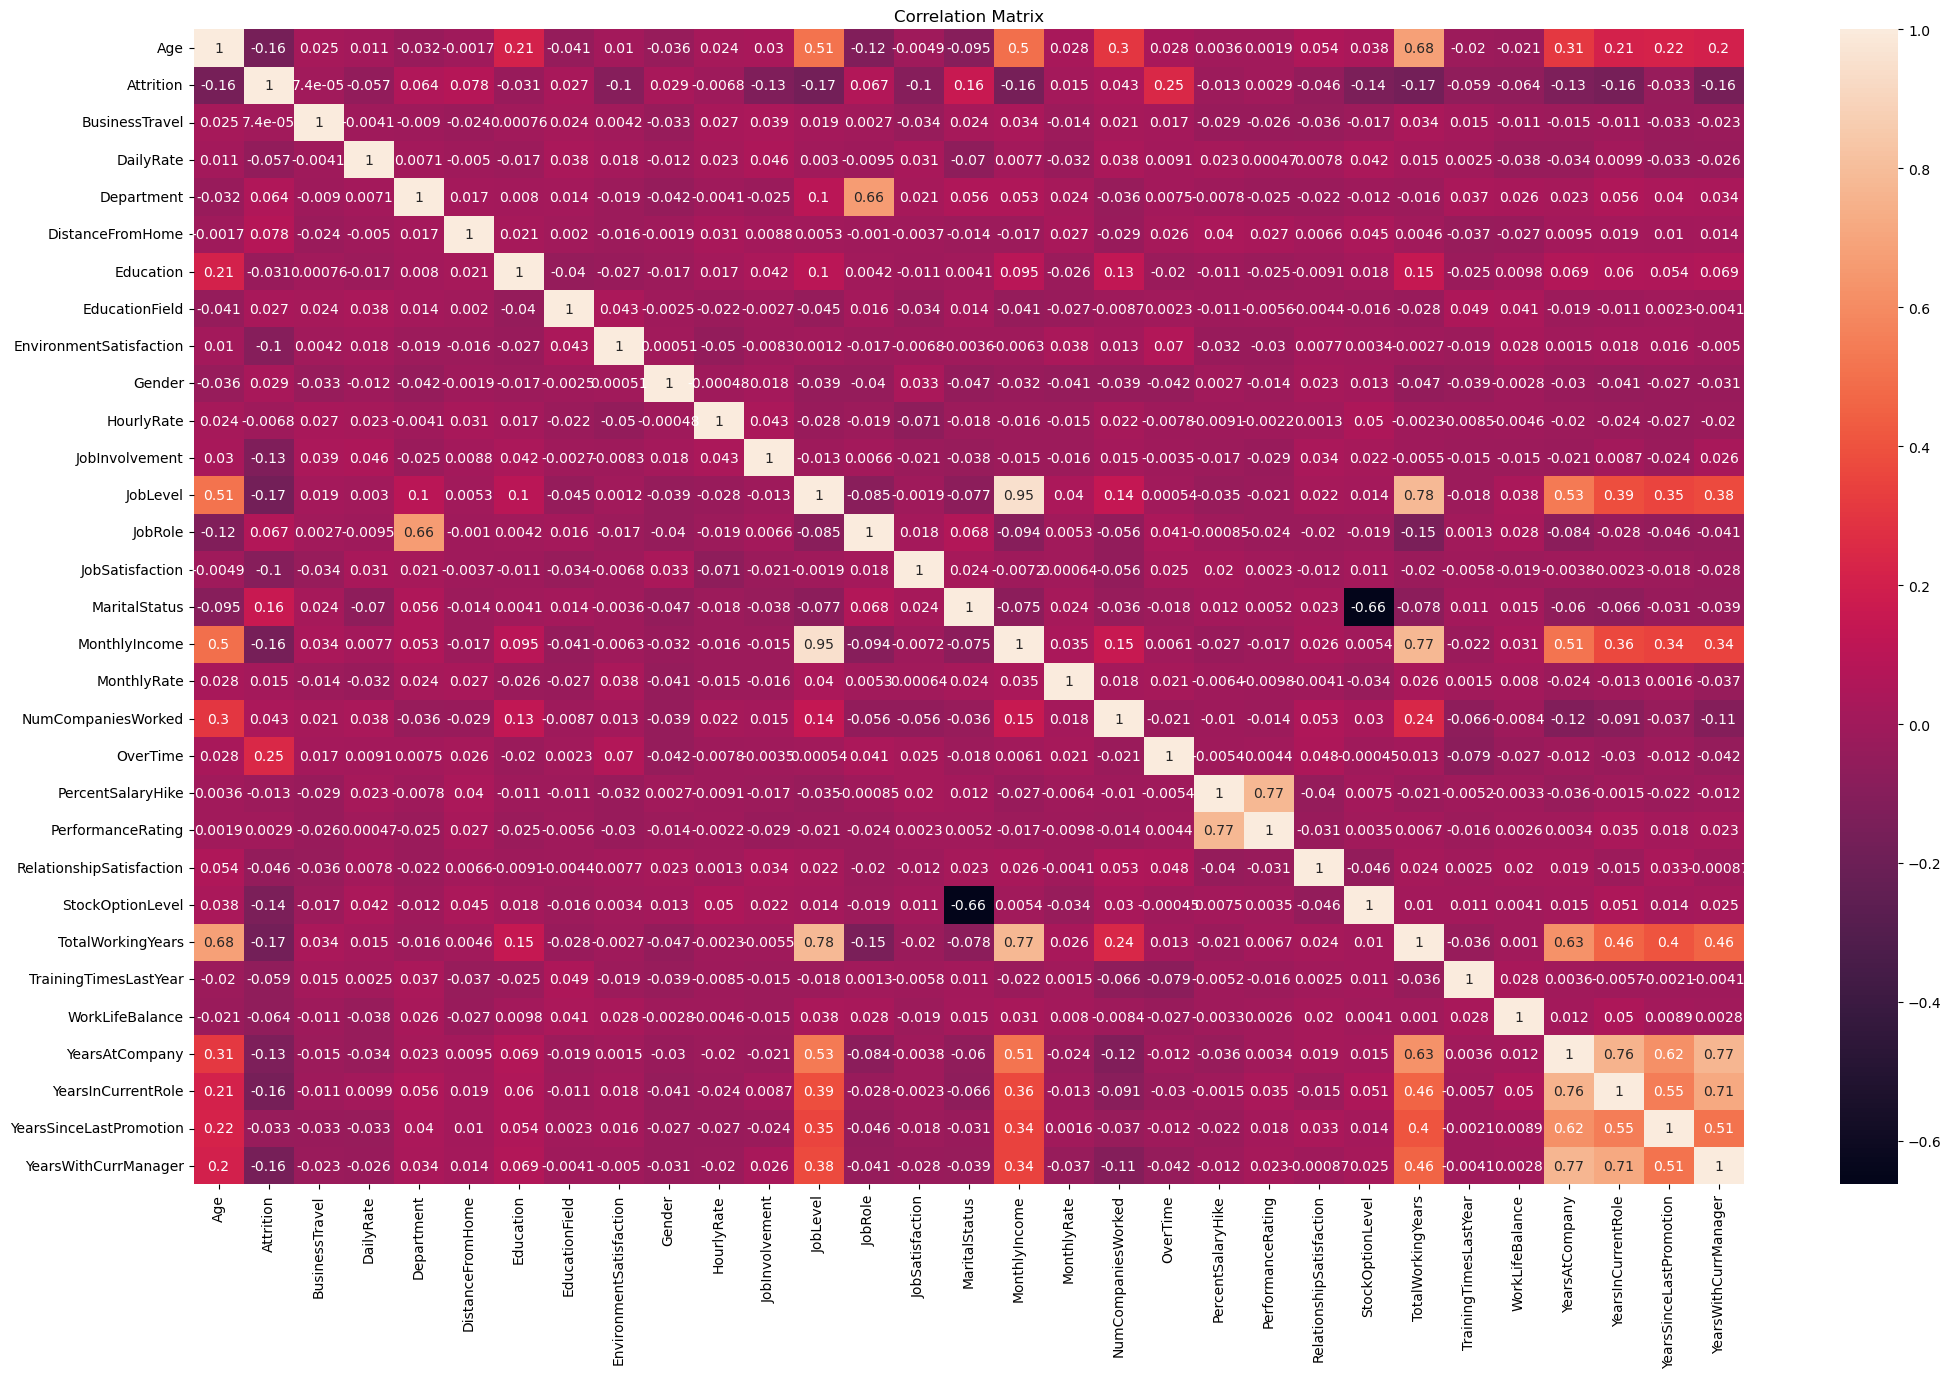

In [108]:
plt.figure(figsize = [25, 15])
sns.heatmap(hr.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

The heatmap above shows that our target label “Attrition” has positive and negative correlations to the feature columns. We also see very low or zero multi-colinearity, so we don’t have to worry about that. Since the one’s that represent the value are interdependent with those feature columns, I intend to keep and maintain them.

In [109]:
z = np.abs(zscore(hr))
threshold = 3
hr1 = hr[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", hr.shape)
print ("Shape of the dataframe after removing outliers: ", hr1.shape)
print ("Percentage of data loss post outlier removal: ", (hr.shape[0]-hr1.shape[0])/hr.shape[0]*100)

hr=hr1.copy() # reassigning the changed dataframe name to our original dataframe n

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [44]:
hr.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [110]:
#checking for skewness

In [111]:
hr.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Splitting the dataset 'X' and 'Y' for feature and Target

In [112]:
X = hr.drop('Attrition', axis=1)
Y = hr['Attrition']

In [113]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing our label column values to figure out how many rows each category takes up. This shows class imbalance which we will have to rectify by oversampling.

In [114]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [115]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

Now, after applying over sampling, we are going to list the values again in our label column for cross checking the updated data. Here, we can see that we solved the class imbalance issue and now all categories have the same data, making sure that our machine learning model doesn’t get biased towards any particular category.

# Feature Scaling

In [116]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.698371,0.660041,0.870682,1.376532,-1.130695,-0.741963,-1.018516,-0.439879,-1.326860,1.535099,...,-0.336841,-1.428502,-0.751779,-0.167046,-2.117935,-2.208428,0.156362,0.236056,-0.696117,0.577190
1,1.625263,-1.011373,-1.322254,-0.585182,-0.211073,-1.760567,-1.018516,0.488799,0.857579,-0.222467,...,2.968764,1.436750,0.501727,0.151767,0.333816,0.539943,1.080764,1.234910,-0.270171,1.238794
2,0.234925,0.660041,1.592779,-0.585182,-0.999320,-0.741963,1.363179,1.417478,0.857579,1.428580,...,-0.336841,-0.473418,-0.751779,-0.326453,0.333816,0.539943,-1.230241,-1.095749,-0.696117,-1.076821
3,-0.228521,-1.011373,1.643405,-0.585182,-0.867946,1.295246,-1.018516,1.417478,-1.326860,-0.488765,...,-0.336841,0.481666,-0.751779,-0.167046,0.333816,0.539943,0.618563,1.234910,0.581722,-1.076821
4,-0.923690,0.660041,-0.490910,-0.585182,-0.999320,-1.760567,0.569281,-1.368558,0.857579,-1.340918,...,-0.336841,1.436750,0.501727,-0.485859,0.333816,0.539943,-0.768040,-0.429847,0.155776,-0.415217


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Regression Models

In [117]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 77.89291882556131 on Random State 464


# Training and Testing data sets

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=464)

In [120]:
# Classification Model Function

def classify(model, X, Y):
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=464)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = accuracy_score(Y_test, pred) * 100
    print(f"{type(model).__name__} Accuracy Score: {acc_score:.2f}%")
    
    # Classification Report
    class_report = classification_report(Y_test, pred, target_names=list(map(str, model.classes_)))
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5).mean() * 100
    print(f"Cross Validation Score ({type(model).__name__}): {cv_score:.2f}%")
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
    
    return acc_score, class_report, cv_score, result

 For any machine learning model that calls for this function, I have defined a class that will perform the train test split, train the machine learning model, predict the label value, obtain the accuracy score, generate the classification report, obtain the cross validation score and the result of the difference between the accuracy score and the cross validation score.

In [121]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

LogisticRegression Accuracy Score: 77.89%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       299
           1       0.77      0.78      0.77       280

    accuracy                           0.78       579
   macro avg       0.78      0.78      0.78       579
weighted avg       0.78      0.78      0.78       579

Cross Validation Score (LogisticRegression): 67.88%

Accuracy Score - Cross Validation Score is 10.01606621514945


(77.89291882556131,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.78       299\n           1       0.77      0.78      0.77       280\n\n    accuracy                           0.78       579\n   macro avg       0.78      0.78      0.78       579\nweighted avg       0.78      0.78      0.78       579\n',
 67.87685261041186,
 10.01606621514945)

In [122]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

SVC Accuracy Score: 48.36%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.48      1.00      0.65       280

    accuracy                           0.48       579
   macro avg       0.24      0.50      0.33       579
weighted avg       0.23      0.48      0.32       579

Cross Validation Score (SVC): 53.88%

Accuracy Score - Cross Validation Score is -5.525562939778105


(48.35924006908463,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       299\n           1       0.48      1.00      0.65       280\n\n    accuracy                           0.48       579\n   macro avg       0.24      0.50      0.33       579\nweighted avg       0.23      0.48      0.32       579\n',
 53.88480300886273,
 -5.525562939778105)

In [123]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

DecisionTreeClassifier Accuracy Score: 86.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       299
           1       0.85      0.87      0.86       280

    accuracy                           0.86       579
   macro avg       0.86      0.86      0.86       579
weighted avg       0.86      0.86      0.86       579

Cross Validation Score (DecisionTreeClassifier): 84.51%

Accuracy Score - Cross Validation Score is 1.5035853054571362


(86.01036269430051,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86       299\n           1       0.85      0.87      0.86       280\n\n    accuracy                           0.86       579\n   macro avg       0.86      0.86      0.86       579\nweighted avg       0.86      0.86      0.86       579\n',
 84.50677738884337,
 1.5035853054571362)

In [124]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

RandomForestClassifier Accuracy Score: 93.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       299
           1       0.97      0.90      0.93       280

    accuracy                           0.93       579
   macro avg       0.94      0.93      0.93       579
weighted avg       0.94      0.93      0.93       579

Cross Validation Score (RandomForestClassifier): 91.76%

Accuracy Score - Cross Validation Score is 1.6739082170549864


(93.43696027633851,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94       299\n           1       0.97      0.90      0.93       280\n\n    accuracy                           0.93       579\n   macro avg       0.94      0.93      0.93       579\nweighted avg       0.94      0.93      0.93       579\n',
 91.76305205928352,
 1.6739082170549864)

In [125]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

KNeighborsClassifier Accuracy Score: 71.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.57      0.67       299
           1       0.66      0.88      0.75       280

    accuracy                           0.72       579
   macro avg       0.75      0.72      0.71       579
weighted avg       0.75      0.72      0.71       579

Cross Validation Score (KNeighborsClassifier): 71.03%

Accuracy Score - Cross Validation Score is 0.8201408743473735


(71.84801381692574,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.57      0.67       299\n           1       0.66      0.88      0.75       280\n\n    accuracy                           0.72       579\n   macro avg       0.75      0.72      0.71       579\nweighted avg       0.75      0.72      0.71       579\n',
 71.02787294257837,
 0.8201408743473735)

In [126]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

ExtraTreesClassifier Accuracy Score: 95.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       299
           1       0.97      0.94      0.95       280

    accuracy                           0.96       579
   macro avg       0.96      0.95      0.95       579
weighted avg       0.96      0.96      0.96       579

Cross Validation Score (ExtraTreesClassifier): 93.40%

Accuracy Score - Cross Validation Score is 2.109260810680624


(95.50949913644214,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.96       299\n           1       0.97      0.94      0.95       280\n\n    accuracy                           0.96       579\n   macro avg       0.96      0.95      0.95       579\nweighted avg       0.96      0.96      0.96       579\n',
 93.40023832576152,
 2.109260810680624)

In [127]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

XGBClassifier Accuracy Score: 92.57%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       299
           1       0.95      0.89      0.92       280

    accuracy                           0.93       579
   macro avg       0.93      0.92      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation Score (XGBClassifier): 89.56%

Accuracy Score - Cross Validation Score is 3.0096502767539874


(92.573402417962,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.96      0.93       299\n           1       0.95      0.89      0.92       280\n\n    accuracy                           0.93       579\n   macro avg       0.93      0.92      0.93       579\nweighted avg       0.93      0.93      0.93       579\n',
 89.56375214120801,
 3.0096502767539874)

As we can see that Extra tree classifier have a highest accuracy score with 95.51% we will go ahed with it

# Hyper parameter tuning on the best classification ML model

choosing Extra Tree Classifier


In [129]:
f_mod = {
    'n_estimators': [20, 40, 60, 80, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV
GSCV=GridSearchCV(ExtraTreesClassifier(),f_mod,cv=5)
GSCV.fit(X_train,Y_train)



GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [130]:
# Print the best hyperparameters and corresponding accuracy
print(GSCV.best_score_)
print(GSCV.best_params_)

0.9424210805260195
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [131]:
Final_Model= ExtraTreesClassifier(criterion='gini',max_features='log2',min_samples_split=2,n_estimators=100)
classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_accuracy=(accuracy_score(Y_test,fmod_pred))*100
accuracy_score=print('accuracy_score=',fmod_accuracy)

accuracy_score= 95.68221070811744


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it 95.68221

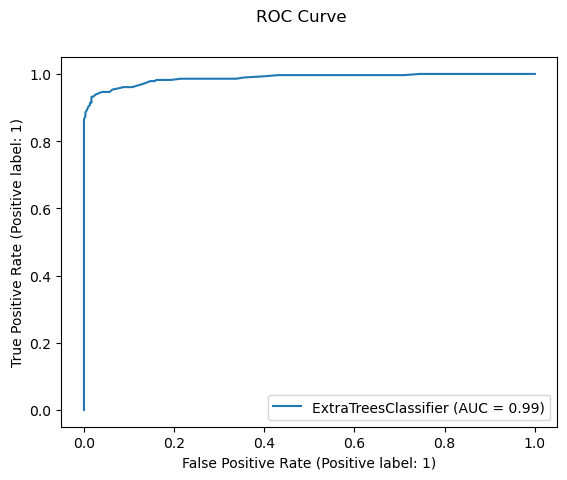

In [135]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AUC = 99%, WHICH IS VERY GOOD

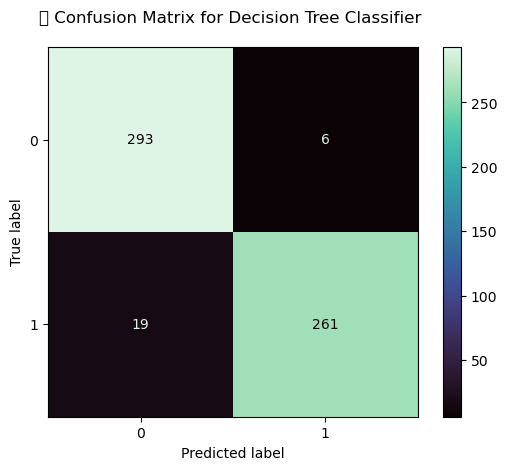

In [137]:
class_names = hr.columns
metrics.plot_confusion_matrix(classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [138]:
filname='Final_HRModel1234'

In [141]:
filename = "Final_HRModel1234"
joblib.dump(Final_Model, filename)

['Final_HRModel1234']